In [1]:
import pandas as pd
import numpy as np
import datetime
from scorepi import *
from epiweeks import Week
import matplotlib.pyplot as plt
from collections import defaultdict
import seaborn as sns

In [20]:
model = "MOBS_NEU-GLEAM_COVID"
rd=12
predictions = pd.read_parquet(f'./dat/{model}_rd{rd}.pq')

start_week = Week(2022,2)
end_week = Week(2022,13)
max_date = datetime.datetime(2022, 3, 15)

predictions["scenario_letter"] = predictions.scenario_id.str[0]
predictions.drop(predictions[predictions.type == 'point'].index, inplace=True)

In [32]:
incidence = True
target = 'hosp'

In [21]:
predictions

,scenario_id,scenario_name,model_projection_date,target,target_end_date,quantile,type,location,value,scenario_letter
12,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc death,2022-01-15,0.000,quantile,01,1.272734,A
13,A-2022-01-09,optSev_highIE,2022-01-09,2 wk ahead inc death,2022-01-22,0.000,quantile,01,0.781734,A
14,A-2022-01-09,optSev_highIE,2022-01-09,3 wk ahead inc death,2022-01-29,0.000,quantile,01,0.752752,A
15,A-2022-01-09,optSev_highIE,2022-01-09,4 wk ahead inc death,2022-02-05,0.000,quantile,01,1.291676,A
16,A-2022-01-09,optSev_highIE,2022-01-09,5 wk ahead inc death,2022-02-12,0.000,quantile,01,3.746816,A
...,...,...,...,...,...,...,...,...,...,...
389371,D-2022-01-09,pessSev_lowIE,2022-01-09,9 wk ahead inc hosp,2022-03-12,0.900,quantile,US,646.468869,D
389372,D-2022-01-09,pessSev_lowIE,2022-01-09,9 wk ahead inc hosp,2022-03-12,0.950,quantile,US,1155.245091,D
389373,D-2022-01-09,pessSev_lowIE,2022-01-09,9 wk ahead inc hosp,2022-03-12,0.975,quantile,US,3292.928437,D
389374,D-2022-01-09,pessSev_lowIE,2022-01-09,9 wk ahead inc hosp,2022-03-12,0.990,quantile,US,3754.068425,D


In [ ]:
# only want quantile predictions (not point)

In [28]:
predictions = predictions[predictions.location == 'US']

In [39]:
target_prediction_list = [f"{i} wk ahead {'inc' if incidence else 'cum'} {target}" for i in range(1,30+1)]

predictions = predictions[(predictions['target'].isin(target_prediction_list))]

if max_date:
    predictions = predictions[predictions['target_end_date'] <= max_date]

if len(predictions) == 0:
    raise RuntimeError(f"There are no predictions for model {model} at location {target_location}")

scenarios = list(predictions['scenario_letter'].drop_duplicates())
predictions_list = [Predictions(predictions[predictions['scenario_letter'] == scenario], t_col='target_end_date') for scenario in scenarios]
            

In [45]:
list(predictions_list[0].target.unique())[0]

'1 wk ahead inc hosp'

In [46]:
sample = predictions_list[0][predictions_list[0].target =='1 wk ahead inc hosp' ]

In [47]:
sample

,scenario_id,scenario_name,model_projection_date,target,target_end_date,quantile,type,location,value,scenario_letter
0,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.000,quantile,US,14970.195369,A
1,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,1.000,quantile,US,304994.748758,A
2,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.990,quantile,US,302270.357276,A
3,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.975,quantile,US,301443.313987,A
4,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.950,quantile,US,286918.897559,A
5,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.900,quantile,US,271452.784495,A
6,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.850,quantile,US,256955.837789,A
7,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.750,quantile,US,239138.860683,A
8,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.700,quantile,US,231510.367142,A
9,A-2022-01-09,optSev_highIE,2022-01-09,1 wk ahead inc hosp,2022-01-15,0.650,quantile,US,222517.581150,A


In [195]:
interpvals = []
for i in range(len(predictions_list)):
    s = predictions_list[i]
    vals = list(s['value'])
    for j in range(len(vals)):
        interpvals.append(vals[j])

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  interpresults = interpresults.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/1439390321.py:37: FutureWarning: The frame.append method is deprecated and will be rem

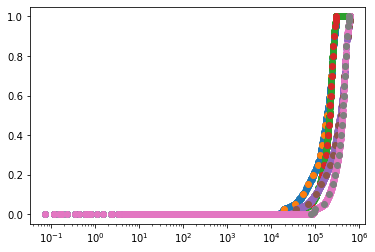

In [205]:
interpresults = pd.DataFrame(columns=['scenario_letter', 'quantile_val','xvalue'])
for i in range(len(predictions_list)):

    sample = predictions_list[i][predictions_list[i].target =='1 wk ahead inc hosp' ]
    quantiles = list(sample['quantile'])
    vals = list(sample['value'])

    a = zip(vals, quantiles)
    a=list(a)
    res = sorted(a, key = lambda x: x[1])
    vals, quants = list(zip(*res))

    vals = list(vals)
    quants = list(quants)
    
    y = np.interp(interpvals, vals, quants)
    
    
    a = zip(interpvals, y)
    a=list(a)
    res = sorted(a, key = lambda x: x[1])
    interpvals, y = list(zip(*res))
    
    
    plt.semilogx(interpvals, y, 'o')
    plt.semilogx(vals, quants, 'o', markersize=6)

    
    letter = list(sample.scenario_letter.unique())[0]
    y = list(y)
    interpvals = list(interpvals)
    for i in range(len(y)):
        qval = y[i]
        xval = interpvals[i]
        new_row = {'scenario_letter':letter, 'quantile_val':qval,'xvalue':xval}
 
        interpresults = interpresults.append(new_row, ignore_index=True)
            

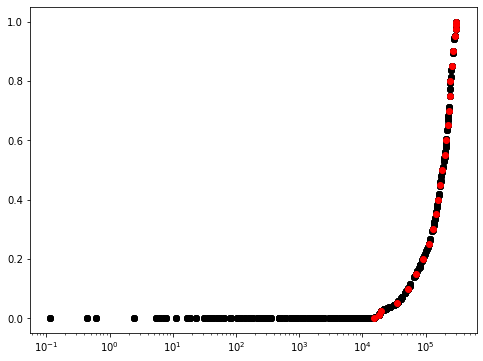

In [141]:
plt.figure(figsize=(8,6))

plt.semilogx(interpvals, y, 'ok')
plt.semilogx(vals, quants, 'or', markersize=6)

plt.show()

In [206]:
interpresults

,scenario_letter,quantile_val,xvalue
0,A,0.00,14970.195369
1,A,0.00,5579.731655
2,A,0.00,6088.541922
3,A,0.00,9518.682350
4,A,0.00,13776.223301
...,...,...,...
3595,D,0.99,578730.456927
3596,D,1.00,583484.887764
3597,D,1.00,599050.776969
3598,D,1.00,600661.081512


In [207]:
df2 = interpresults.groupby('xvalue')['quantile_val'].apply(list)
allxvals = list(df2.index)

In [208]:
probavg = pd.DataFrame(columns=['xval', 'avg_quant'])

for i in allxvals:
    quants = df2[i]
    avgquant = np.mean(quants)
    new_row = {'xval':i, 'avg_quant':avgquant}
 
    probavg = probavg.append(new_row, ignore_index=True)

/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2233780288.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2233780288.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2233780288.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  probavg = probavg.append(new_row, ignore_index=True)
/var/folders/1k/msfckb6d40q9g5y9b70y58hr0000gn/T/ipykernel_79425/2233780288.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [202]:
probavg

,xval,avg_quant
0,0.075008,0.00
1,0.116360,0.00
2,0.118326,0.00
3,0.150045,0.00
4,0.172047,0.00
...,...,...
895,578730.456927,0.99
896,583484.887764,1.00
897,599050.776969,1.00
898,600661.081512,1.00


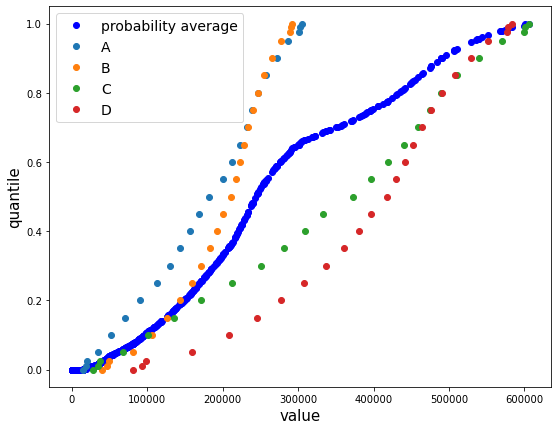

In [216]:
plt.figure(figsize=(9,7))
plt.plot(probavg['xval'], probavg['avg_quant'],'bo', label = 'probability average')
for i in range(len(predictions_list)):
    letter = list(predictions_list[i].scenario_letter.unique())[0]
    sample = predictions_list[i][predictions_list[i].target =='1 wk ahead inc hosp' ]
    quantiles = list(sample['quantile'])
    vals = list(sample['value'])

    a = zip(vals, quantiles)
    a=list(a)
    res = sorted(a, key = lambda x: x[1])
    vals, quants = list(zip(*res))

    vals = list(vals)
    quants = list(quants)
    
    plt.plot(vals, quants,'o', label = letter)
    
plt.xlabel('value', fontsize=15)
plt.ylabel('quantile', fontsize=15)
plt.legend(fontsize=14)